In [155]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

import sys
sys.path.append('/Users/clementinechazal/Documents/these/kernel_path')
import functions 

In [ ]:
n = 200
d = 2

Mu = [-2.5*np.ones(2), 2.5*np.ones(2)]
Sigma = [np.identity(2), np.identity(2)]
p = [1/2, 1/2]

X1 =fc.mixt_gauss(Mu, Sigma, n, p) # Samples from the target distribution pi_1, a mixture of 2 gaussians

In [169]:
sigma = 10
k = lambda x,y : fc.k_gauss(x,y,sigma)
dk = lambda x,y : fc.dk_gauss(x,y,sigma)
ddk = lambda x,y : fc.ddk_gauss(x,y,sigma)

In the next cell we derive the vector field $v_t$ for $t = \tau,...,T= K\times \tau$ of the Ornstein Uhlenbeck marginals using the OU dynamics (Z) from the target $\pi_1$ to a gaussian $\gamma^d$. The particules noted X are not necessar to derive $v_t$, they only aim at checking that the dynamic induced by the vector fields $v_t$ reproduced OU process, which is not the case for the moment... 

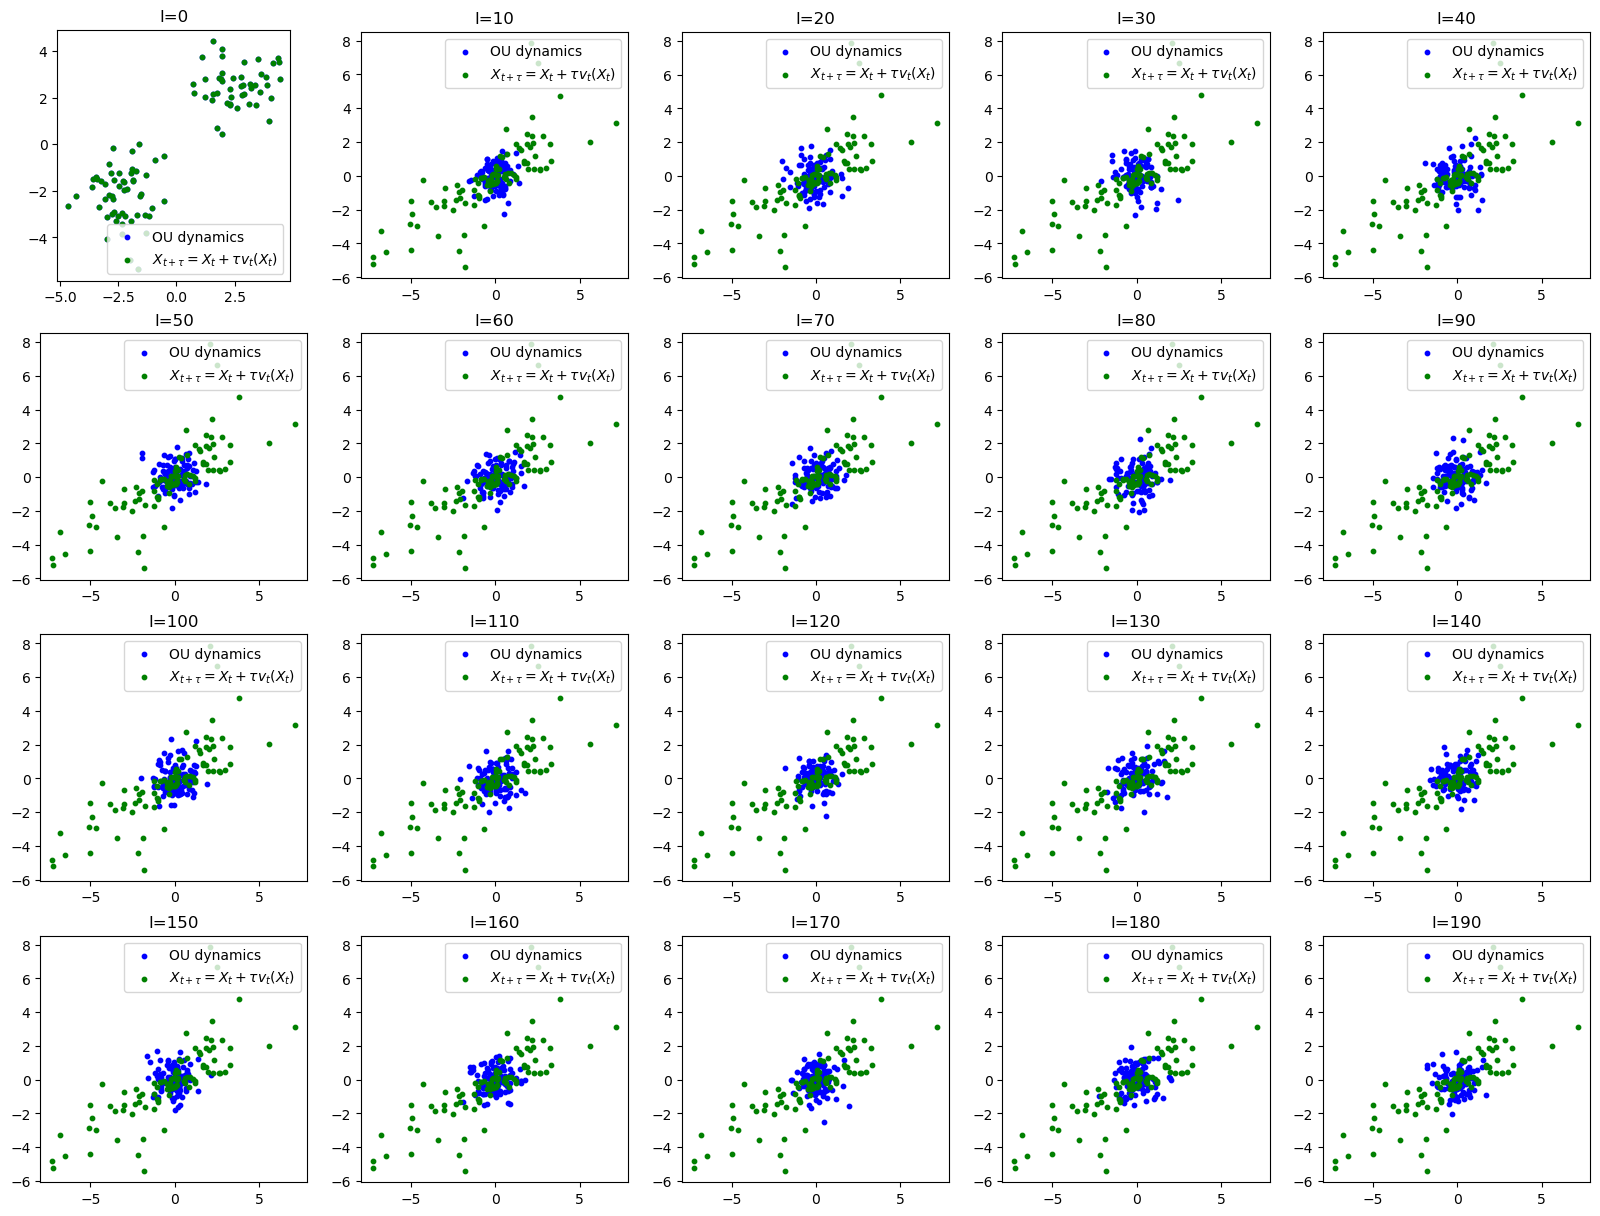

In [179]:
import functions as fc
import importlib
importlib.reload(fc)

V = []
K = 200
tau = 0.5
lambd = 0.01
X = X1 
Z = X1
fig, axs = plt.subplots(nrows=2*K//100, ncols=5, figsize=(20, 15))

xlim = (-4, 4)
ylim = (-4, 4)

for l in range(K):
    t = (l+1) * tau
     
    if l%10 == 0:
        ll = l//10
        ax = axs[ll//5, ll%5]
        ax.scatter(Z[:, 0], Z[:, 1],color = "blue", label = "OU dynamics",s=10) 
        ax.scatter(X[:, 0], X[:, 1],color = "green", label = r"$X_{t+\tau} = X_{t} + \tau v_t(X_{t})$",s=10) 
        ax.set_title(f'l={l}')
        ax.set_aspect('equal')
        #ax.set_xlim(xlim)
        #ax.set_ylim(ylim)
        ax.legend()
    
    eps = np.random.randn(n, d)
    psi = fc.psi(X1, eps, t)
    sigma_t = np.sqrt(fc.sigma_2(t))

    Z = np.exp(-t) * X1+ sigma_t * eps #Ornstein-Uhlenbeck dynamics     
    Xi = fc.Xi(Z, eps, k, dk, ddk, t)
    phi = np.linalg.inv(1/n * Xi + lambd * np.identity(n)) @ psi
    M = lambda x : k(Z, x)[:, :, None] * eps[:,np.newaxis,:] / sigma_t + dk(Z, x)
    v = lambda x : 1/n * np.sum(phi[:, np.newaxis, np.newaxis] * M(x), axis=0)
    V.append(v)
    X = X + tau * v(X)
    
 

In the next cell, we start form a set of particules $Y_j \sim \gamma^d$ and inverse OU process with the objective to recover a sample for $\pi_1$. I doesn't work yet. 

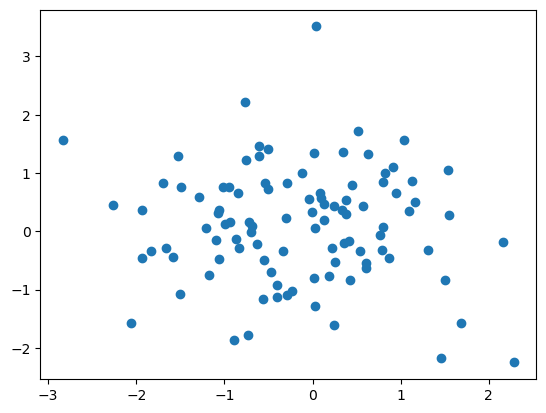

In [152]:
m = 100
Y = scs.multivariate_normal.rvs(np.zeros(d),np.identity(d),m)

for i in range(K):
    Y = Y - tau * V[K-1-i](Y)

plt.scatter(Y[:,0], Y[:,1])
plt.show()
